## Лабораторная работа №3
## 20-ИВТ-3 Себаштиау Кета 
## Вариант 44


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score

df = pd.read_csv('mushrooms.csv')

## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

1. cap-shap:                                Форма шляпки
2. cap-surface:                             Поверхность шляпки
3. cap-color:                               Цвет шляпки
4. bruises:                                 Пятна
5. odor:                                    Запах
6. gill-attachment:                         Форма жабер
7. gill-spacing:                            Расстояние между жабрами
8. gill-size:                               Размер жабер
9. gill-color:                              Цвет жабер
10. stalk-shape:                            Форма ножки
11. stalk-root:                             Корень
12. stalk-surface-above-ring:               Форма ножки выше юбки
13. stalk-surface-below-ring:               Форма ножки ниже юбки
14. stalk-color-above-ring:                 Цвет ножки выше юбки
15. stalk-color-below-ring:                 Цвет ножки ниже юбки
16. veil-type:                              Форма юбки
17. veil-color:                             Цвет юбки
18. ring-number:                            Количество колец
19. ring-type:                              Тип кольца
20. spore-print-color:                      Цвет спор
21. population:                             Популяция
22. habitat:                                Среда обитания

## 2. Удалите дубликаты строк в наборе данных. приведите размер набора данных до и после данной операции

In [5]:
df.shape

(8124, 23)

In [6]:
df = df.drop_duplicates()
df.shape

(8124, 23)

## 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

Масштабирование не требуется, т.к. в наборе данных нет количественных признаков.

## 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [8]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


{0: 'f', 1: 't'}


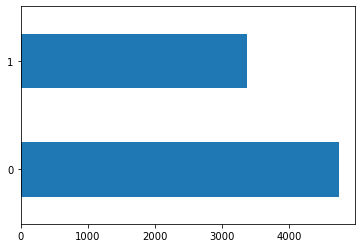

In [10]:
df.drop('veil-type', axis = 1, inplace = True)

label_encoder = LabelEncoder()
mapped_education = pd.Series(label_encoder.fit_transform(df['bruises']))
#fit_transform используется для генерации параметров обучающей модели на основе обучающих данных и применяются к модели для генерации преобразованного набора данных.
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [12]:
categorical_columns = df.columns[df.dtypes == 'object'].union(['bruises'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

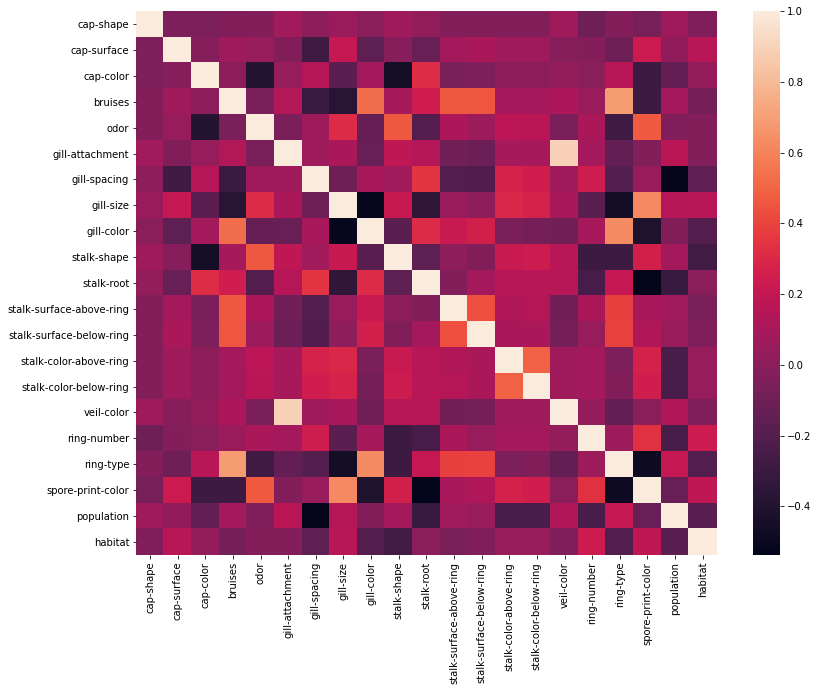

In [13]:
plt.rcParams["figure.figsize"]= 13, 10
corr_matrix = df.drop('class', axis=1).corr()
sns.heatmap(corr_matrix);
plt.show()

## 6. Заполните пропущенные значения в данных

In [14]:
#не требуется, но если было бы необходимо, то:
df = df.fillna(0)

## 7. Решите поставленную задачу классификации в соответствии с заданием

In [22]:
# Решающее дерево
dtc = DecisionTreeClassifier()
X, y = df.drop('class', axis=1), df['class']
# test_size показывает, какой объем данных нужно выделить для тестового набора
# random_state - сид для случайной генерации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 77) 
params = {'max_depth': list(range(1, 22)), 'max_features': list(range(1, 22))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 1.0 	 at features number: 17 	 at depth: 7
test score:  0.9987694831829368


In [16]:
# K ближайщих соседей
knn = neighbors.KNeighborsClassifier()
df1 = df.copy()
params = {'n_neighbors': list(range(1, 20))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

best train score:  0.9994722955145118 	 at neighbors number:  1


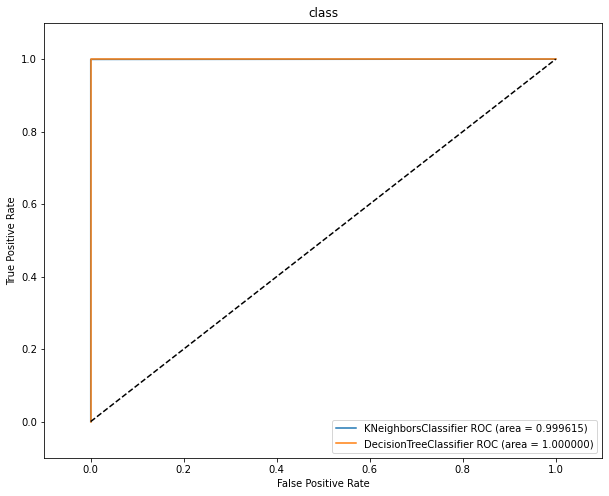

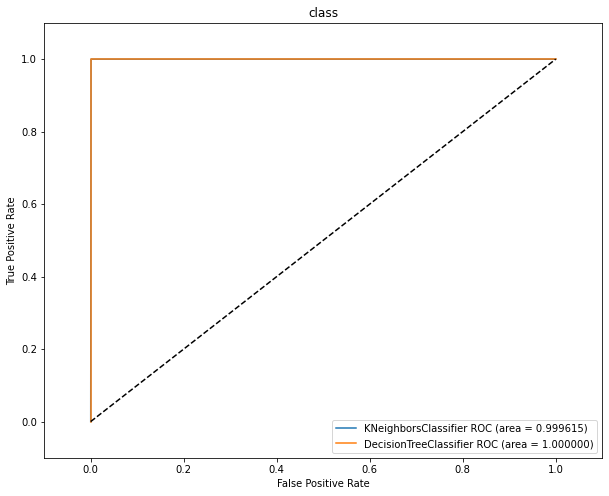

In [23]:
plt.figure(figsize=(10,8))
# K ближайщих соседей
knn = neighbors.KNeighborsClassifier ( n_neighbors =best_num)
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()


plt.figure(figsize=(10,8))
# K ближайщих соседей
knn = neighbors.KNeighborsClassifier( n_neighbors = best_num)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

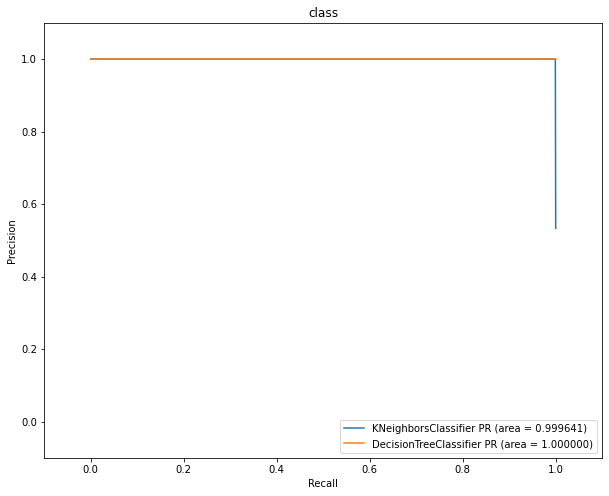

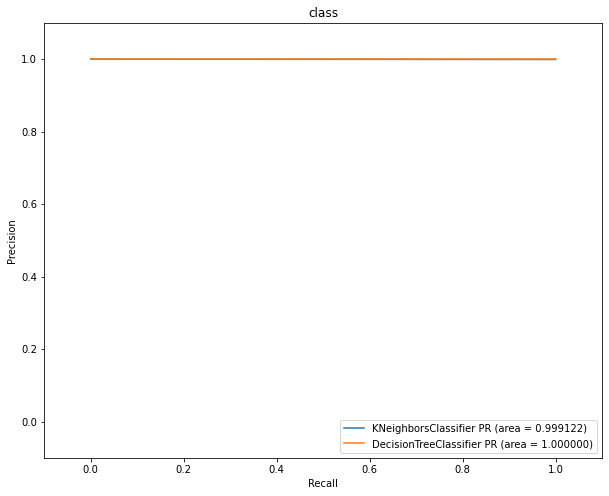

In [24]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()


plt.figure(figsize=(10,8))
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

### Вывод:
Классификаторы дерево принятия решений и k ближайших соседей(кол-во ближ. объектов) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.998~0.999, что очень точно.